# Prediction using Unsuperviesd Machine Learning 

## Pooja Rathore

In [3]:
# import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
#load datasets
Iris = datasets.load_iris()
df = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# find the optimum no. of cluster for K-means Classification

In [6]:
x = df.iloc[:,:].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [10]:
wcss=[] #wcss= within cluster sum of squares(distance between various observations)
from sklearn.cluster import KMeans
for i in range(1,11): # changing the number of clusters each time
    kmeans=KMeans(init="k-means++", n_clusters=i, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


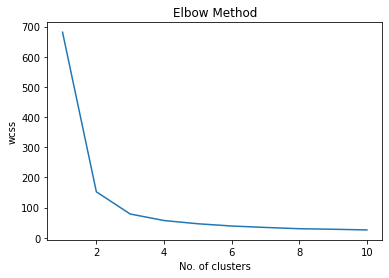

In [12]:
# to find ou optimum no. of clusters using elbow point
# plot the line graph if the result obtained and look for the elbow point
plt.plot(range(1,11), wcss)
plt.title("Elbow Method") # elboe point is he point where no. of clusters will be optimum
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

In [13]:
 # the optimum no. of cluster appears at the elbow point, therefore it is visible that  will be 
# elbow point it is equal to the optimum no. of clusters for this data 
    

In [17]:
# Apply Kmeans classification
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=10, max_iter=300, random_state=0)
y = kmeans.fit_predict(x) # y represents the cluster label


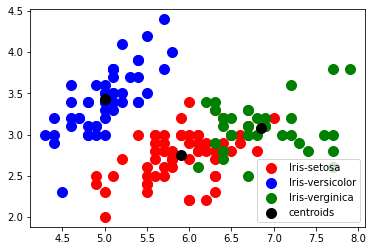

In [21]:
# visualizing the clusters
plt.scatter(x[y==0,0], x[y==0,1], c='red', s=100, label='Iris-setosa')
plt.scatter(x[y==1,0], x[y==1,1], c='blue', s=100, label="Iris-versicolor")
plt.scatter(x[y==2,0], x[y==2,1], c="green", s=100, label="Iris-verginica")

# plot the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="black", s=100,
            label="centroids")
# Black dot represents the centroid of the cluster

# describing the elements of graph
plt.legend()